In [ ]:
import pathlib
from google.colab import drive
drive.mount('/content/gdrive')
data_dir = "/content/gdrive/My Drive/Colab Notebook/dataset/"
data_dir = pathlib.Path(data_dir)

Mounted at /content/gdrive


# New Section

# New Section

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import pandas as pd
import seaborn as sn
import tensorflow as tf
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

train_path ='/content/gdrive/MyDrive/Colab Notebooks/dataset/Train/Train'
valid_path = '/content/gdrive/MyDrive/Colab Notebooks/dataset/Validation/Validation'
test_path = '/content/gdrive/MyDrive/Colab Notebooks/dataset/Test/Test'

In [ ]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/gdrive/MyDrive/Colab Notebooks/dataset/Train/Train/*')

In [ ]:
x = Flatten()(resnet.output)
x = Dense(1024,activation='relu')(x)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dataset = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

valid_dataset = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_dataset = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_dataset.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_set = valid_dataset.flow_from_directory(valid_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_dataset.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 1,
                                            class_mode = 'categorical')

Found 1960 images belonging to 8 classes.
Found 640 images belonging to 8 classes.
Found 640 images belonging to 8 classes.


In [ ]:
training_set = train_dataset.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_set = valid_dataset.flow_from_directory(valid_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_dataset.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 1,
                                            class_mode = 'categorical')

Found 1960 images belonging to 8 classes.
Found 640 images belonging to 8 classes.
Found 640 images belonging to 8 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=validation_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_set)
)

<ipython-input-16-d86fd9a9487e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/15
62/62 [==============================] - 1778s 29s/step - loss: 12.9014 - accuracy: 0.1776 - val_loss: 1.9727 - val_accuracy: 0.2672
Epoch 2/15
62/62 [==============================] - 53s 863ms/step - loss: 2.0627 - accuracy: 0.3117 - val_loss: 2.7761 - val_accuracy: 0.2391
Epoch 3/15
62/62 [==============================] - 51s 833ms/step - loss: 2.1238 - accuracy: 0.3194 - val_loss: 1.9212 - val_accuracy: 0.3125
Epoch 4/15
62/62 [==============================] - 53s 864ms/step - loss: 1.6380 - accuracy: 0.4005 - val_loss: 1.6296 - val_accuracy: 0.4234
Epoch 5/15
62/62 [==============================] - 54s 869ms/step - loss: 1.5666 - accuracy: 0.4587 - val_loss: 1.6102 - val_accuracy: 0.4453
Epoch 6/15
62/62 [==============================] - 52s 840ms/step - loss: 1.7065 - accuracy: 0.4337 - val_loss: 1.6047 - val_accuracy: 0.4266
Epoch 7/15
62/62 [==============================] - 51s 827ms/step - loss: 1.4539 - accuracy: 0.4755 - val_loss: 1.5403 - val_accuracy: 0.401

In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=validation_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_set)
)

<ipython-input-17-d86fd9a9487e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/15
62/62 [==============================] - 53s 850ms/step - loss: 1.1382 - accuracy: 0.5740 - val_loss: 1.2393 - val_accuracy: 0.5531
Epoch 2/15
62/62 [==============================] - 51s 818ms/step - loss: 1.1338 - accuracy: 0.5735 - val_loss: 1.3957 - val_accuracy: 0.4719
Epoch 3/15
62/62 [==============================] - 57s 919ms/step - loss: 1.1084 - accuracy: 0.5857 - val_loss: 1.3535 - val_accuracy: 0.5203
Epoch 4/15
62/62 [==============================] - 51s 826ms/step - loss: 1.1925 - accuracy: 0.5577 - val_loss: 1.2189 - val_accuracy: 0.5922
Epoch 5/15
62/62 [==============================] - 60s 981ms/step - loss: 1.1333 - accuracy: 0.5832 - val_loss: 1.2242 - val_accuracy: 0.5281
Epoch 6/15
62/62 [==============================] - 59s 954ms/step - loss: 1.1887 - accuracy: 0.5668 - val_loss: 1.6107 - val_accuracy: 0.4563
Epoch 7/15
62/62 [==============================] - 62s 1s/step - loss: 1.2012 - accuracy: 0.5571 - val_loss: 1.1889 - val_accuracy: 0.5781
Ep

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [ ]:
test_loss,test_acc = model.evaluate(test_set, verbose=2)
print('\nTest accuracy:', test_acc)

640/640 - 461s - loss: 1.2450 - accuracy: 0.5578 - 461s/epoch - 720ms/step

Test accuracy: 0.557812511920929


In [ ]:
test_loss,test_acc = model.evaluate(test_set, verbose=2)
print('\nTest accuracy:', test_acc)

640/640 - 9s - loss: 1.2450 - accuracy: 0.5578 - 9s/epoch - 14ms/step

Test accuracy: 0.557812511920929


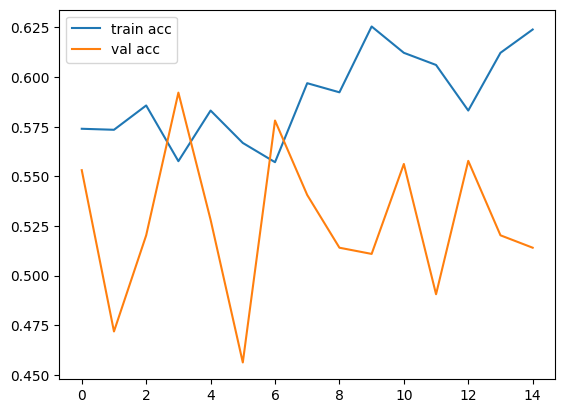

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

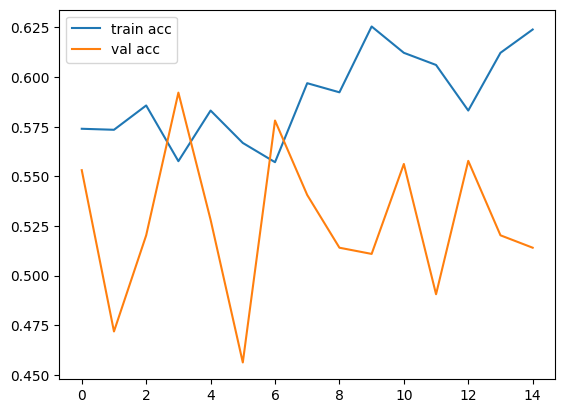

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

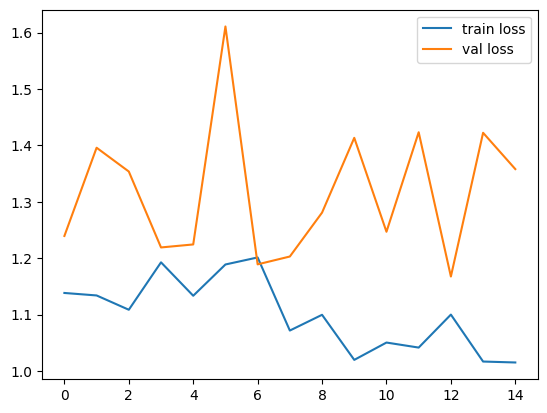

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

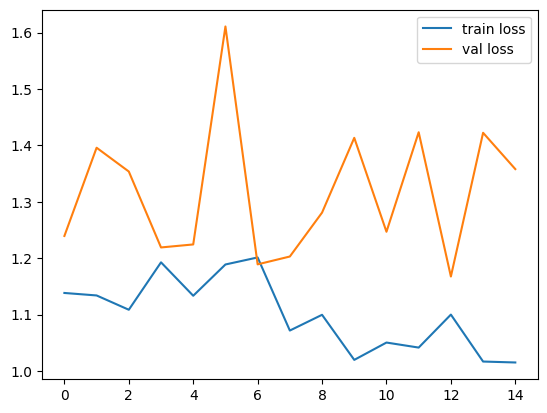

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [ ]:
nb_samples = len(test_set)
print(nb_samples)

640


In [ ]:
nb_samples = len(test_set)
print(nb_samples)

640


1/1 [==============================] - 0s 32ms/step


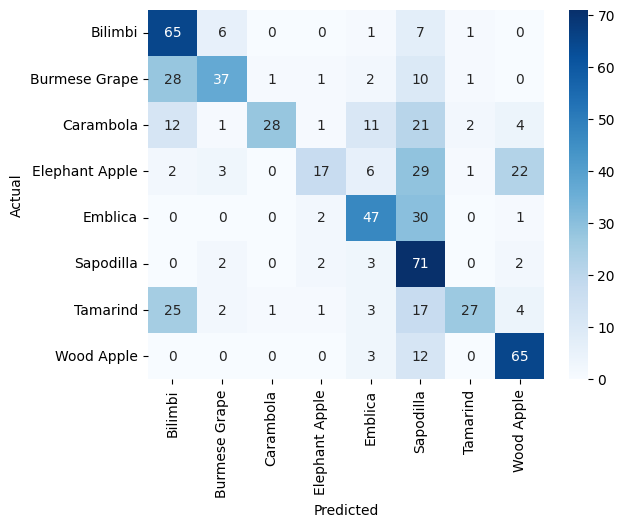

test accuracy : 55.78125000000001


In [ ]:
model = tf.keras.models.load_model("model_resnet50.h5")
filenames = test_set.filenames
#nb_samples = len(test_set)
y_prob=[]
y_act=[]
test_set.reset()
for _ in range(nb_samples):
  X_test,Y_test = test_set.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(training_set.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(training_set.class_indices.keys())[i.argmax()] for i in y_act]


out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix,cmap='Blues', annot=True,fmt='d')
plt.show()
print('test accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

1/1 [==============================] - 0s 45ms/step


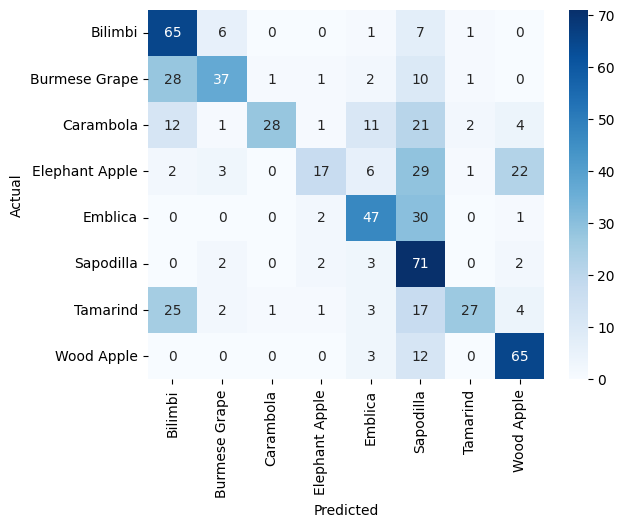

test accuracy : 55.78125000000001


In [ ]:
model = tf.keras.models.load_model("model_resnet50.h5")
filenames = test_set.filenames
#nb_samples = len(test_set)
y_prob=[]
y_act=[]
test_set.reset()
for _ in range(nb_samples):
  X_test,Y_test = test_set.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(training_set.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(training_set.class_indices.keys())[i.argmax()] for i in y_act]


out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix,cmap='Blues', annot=True,fmt='d')
plt.show()
print('test accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))